In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Dimensionality Reduction: MCA & FAMD Assignment

In [2]:
import prince
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the HR data set 

In [3]:
data_url = "data/hr_dataset.csv"
df = pd.read_csv(data_url)
df.head()

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


<IPython.core.display.Javascript object>

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

<IPython.core.display.Javascript object>

In [5]:
df["Zip"] = df["Zip"].astype(str)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    object 
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

<IPython.core.display.Javascript object>

In [7]:
num_cols = ["Age", "Pay Rate", "Days Employed"]

<IPython.core.display.Javascript object>

### Pull out the categorical variables and note the dimensions of the data set.

In [8]:
cat_df = df.drop(num_cols, 1)

<IPython.core.display.Javascript object>

### Reduce these categorical features down to two dimensions using MCA.

In [9]:
mca = prince.MCA(2)
mca.fit(cat_df)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

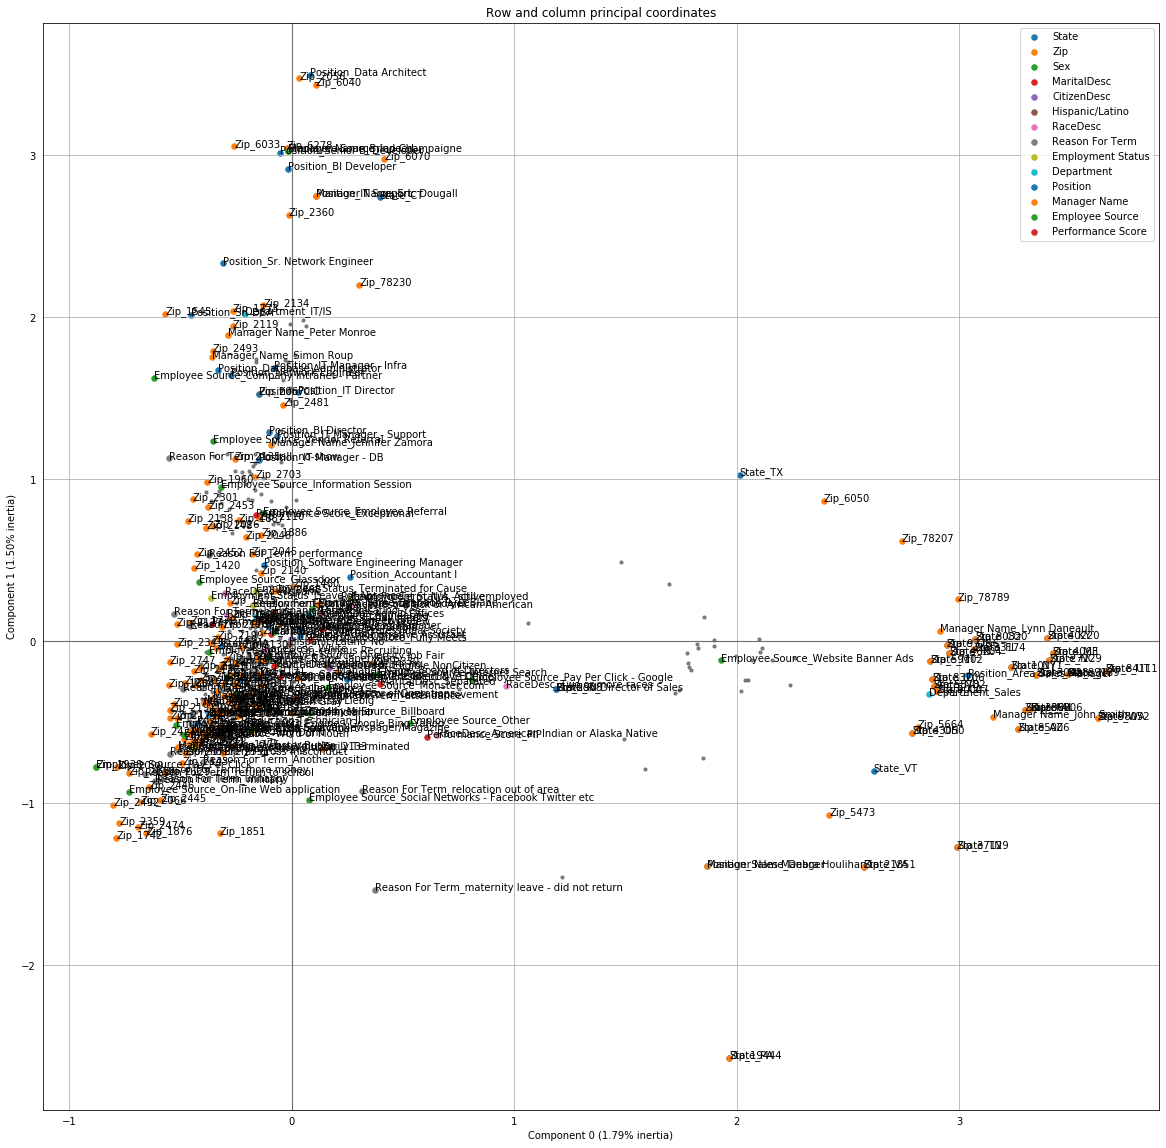

<IPython.core.display.Javascript object>

In [20]:
mca.plot_coordinates(cat_df, show_column_labels=True, figsize=(20, 20))
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

In [25]:
cat_df.shape

(310, 14)

<IPython.core.display.Javascript object>

In [21]:
dum_df = pd.get_dummies(cat_df, drop_first=False)
dum_df.shape

(310, 313)

<IPython.core.display.Javascript object>

In [22]:
dum_df.head()

,State_AL,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,...,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [23]:
ca = prince.CA(n_components=2, random_state=42)
ca.fit(dum_df)


CA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
   n_iter=10, random_state=42)

<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension.

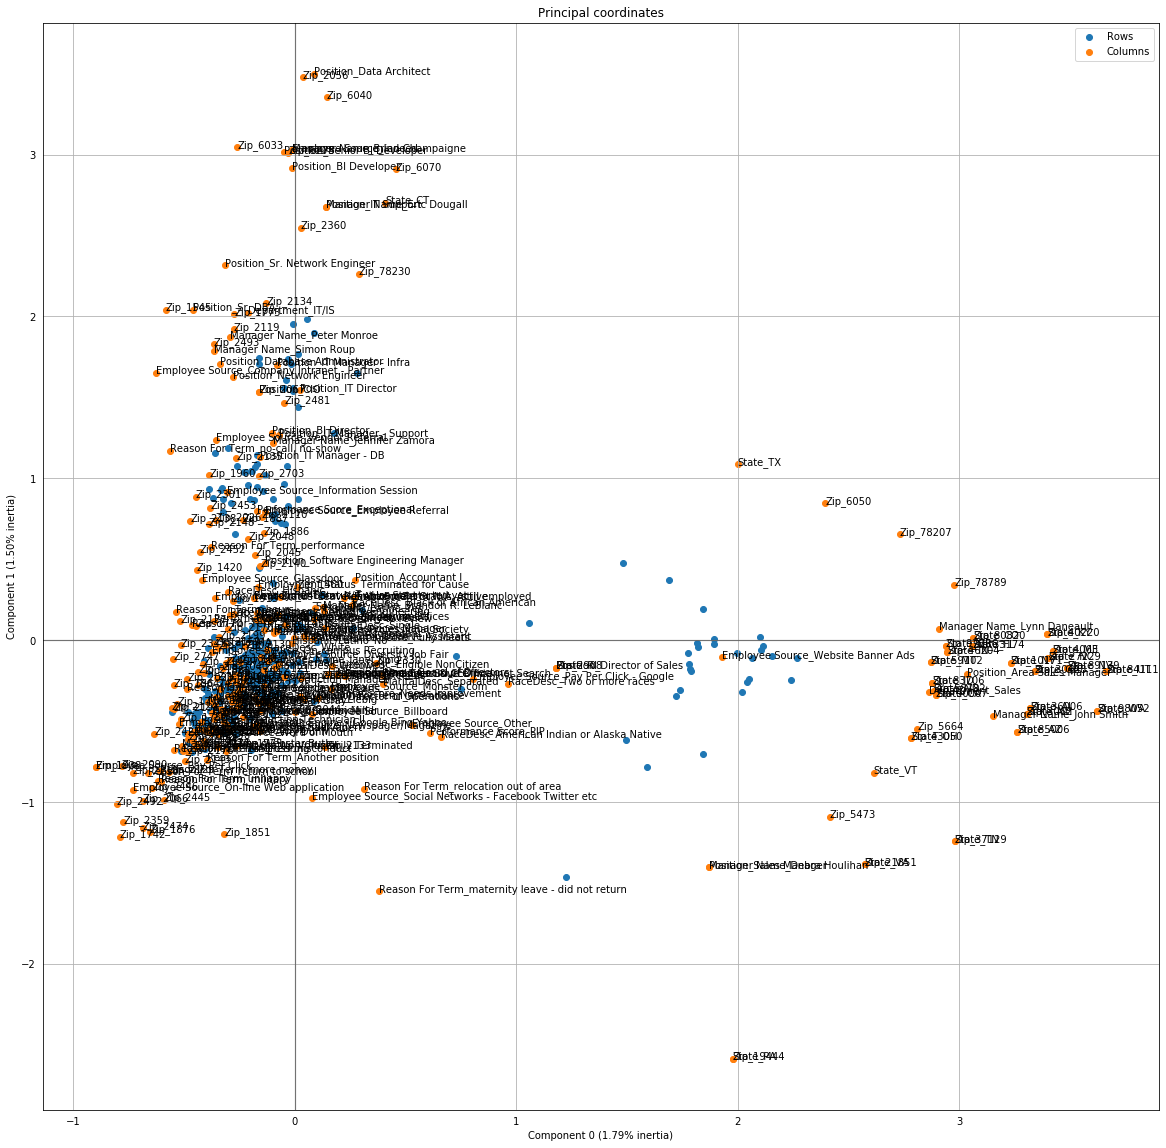

<IPython.core.display.Javascript object>

In [28]:
ca.plot_coordinates(dum_df, figsize=(20, 20), show_row_labels=False)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [15]:
# scale numeric data
num_df = df.select_dtypes("number")
cat_df = df.select_dtypes("O")

<IPython.core.display.Javascript object>

In [16]:
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)

scaled_num = pd.DataFrame(scaled, index=num_df.index, columns=num_df.columns)

scaled_df = pd.concat((scaled_num, cat_df), axis=1)
scaled_df.head()

,Age,Pay Rate,Days Employed,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,-0.995474,-0.181317,2.630552,MA,1450,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,-0.546443,-0.539418,0.161301,MA,1460,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,-0.883216,-0.148762,-0.184941,MA,2703,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,-0.770958,-0.637082,-1.611561,MA,2170,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,-0.995474,-0.958722,-0.463496,MA,2330,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


<IPython.core.display.Javascript object>

In [17]:
# perform famd on x
famd = prince.FAMD(n_components=2, random_state=42)
famd.fit(scaled_df)

FAMD(check_input=True, copy=True, engine='auto', n_components=2, n_iter=3,
     random_state=42)

<IPython.core.display.Javascript object>

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

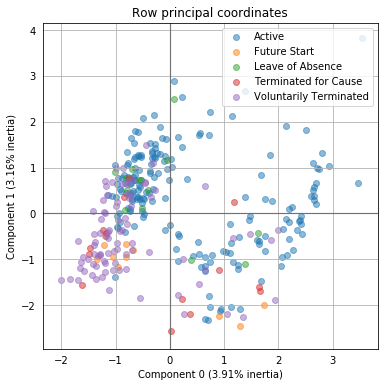

<IPython.core.display.Javascript object>

In [34]:
# plot row coordinates
famd.plot_row_coordinates(
    scaled_df, color_labels=df["Employment Status"], alpha=0.5, ellipse_fill=False
)
plt.show()

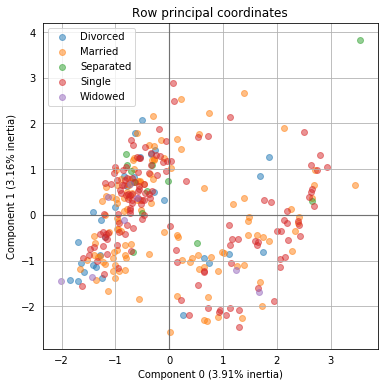

<IPython.core.display.Javascript object>

In [33]:
# plot row coordinates
famd.plot_row_coordinates(
    scaled_df, color_labels=df["MaritalDesc"], alpha=0.5, ellipse_fill=False
)
plt.show()